In [57]:
# Import dependencies
import requests
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import floor
from pprint import pprint
API_KEY = "****************************"
import scipy.stats as st



In [58]:
# Install full-fred module
%pip install full-fred

Note: you may need to restart the kernel to use updated packages.


# Functions to create new Dataframes

In [59]:
# Create function to Relabel & Organize Datasets from full_fred Module
def reformat_fred_df(dataframe, value_col_rename=str):
    """Returns reformated Dataframe with Date and Renamed Value Column.
    Converts Date to datetime64 & Value to float. 
    (Does not accept strings in Value Columns*! 
    Replace str values to Nan in 'value' columns.)

    **Parameters**

    :dataframe --> Takes raw dataframe from .get_series_df method 
    :value_col_rename --> Renames 'value' column to proper Value name 
    e.g. pd.rename(columns={'value': value_col_rename})
    """

    # Rename columns
    dataframe = dataframe.rename(
        columns={
            "date": "Date",
            "value": value_col_rename,
        }
    )

    # Grab Columns needed for Dataframe
    dataframe = dataframe[["Date", value_col_rename]]

    # Change 'Date' column to datetime64 type
    dataframe["Date"] = pd.to_datetime(dataframe["Date"])

    # Change 'Value' column to float
    try:
        dataframe[value_col_rename] = dataframe[value_col_rename].astype(float)
    except ValueError:
        print("Value Error! Please convert string value to Nan in value column.")

    # Add 'Year' Column
    dataframe["Year"] = dataframe["Date"].dt.year

    # Format Dataframe
    dataframe = dataframe[["Year", "Date", value_col_rename]]

    # Return dataframe
    return dataframe

In [60]:
# Create function to create Dataframe based on average value for each year from 
# formatted Fred dataframe
def average_values_by_year_df(dataframe):
    """Returns new Dataframe with average values based on the year of dataframe passed.
    
    **Parameters**

    :dataframe --> Takes dataframe that has following cols: Year|Date|{Value}| 
    :Only takes Fred Data that has already been formatted. Otherwise Error will occur.
    """

    # Get dataframe value column
    value_col = list(dataframe)[2]

    # Group all the values by year
    avg_by_year = dataframe.groupby('Year')[value_col].mean()

    # Reset the index, so that year is a column instead of index
    avg_by_year = avg_by_year.reset_index()

    # Round value column by two
    avg_by_year[value_col] = round(avg_by_year[value_col], 2)
 
    # Create new dataframe
    new_df = pd.DataFrame(avg_by_year)

    # Rename value column to label it as Average + value
    new_df = new_df.rename(columns={value_col: f"Avg. {value_col}"})

    # Return dataframe
    return new_df

# Data Collection using Full Fred library
##### Full Fred Documentation <https://github.com/7astro7/full_fred>


In [61]:
# Search through Fred database for series 
# #Storing in variable to avoid running output
home_sales_search = fred.search_for_series(search_words=["home sales"])


# 1)Open in text editor to go through data 
# 2)Command + f to search through text editor
# 3)Grab the 'id' value for the dataset you want
# 4)For example - if we want the id from the first dataset
# id = 'MSPUS' 

NameError: name 'fred' is not defined

## Median Home Sale Price Data (1963 - Present)

In [ ]:
# Use the .get_series_df method and enter the 'id' from the desired dataset
median_home_price = fred.get_series_df('MSPUS')
median_home_price

,realtime_start,realtime_end,date,value
0,2023-11-14,2023-11-14,1963-01-01,17800
1,2023-11-14,2023-11-14,1963-04-01,18000
2,2023-11-14,2023-11-14,1963-07-01,17900
3,2023-11-14,2023-11-14,1963-10-01,18500
4,2023-11-14,2023-11-14,1964-01-01,18500
...,...,...,...,...
238,2023-11-14,2023-11-14,2022-07-01,468000.0
239,2023-11-14,2023-11-14,2022-10-01,479500.0
240,2023-11-14,2023-11-14,2023-01-01,429000.0
241,2023-11-14,2023-11-14,2023-04-01,418500.0


In [ ]:
# Reformat Dataframe
median_home_price_df = reformat_fred_df(median_home_price, "Median Home Sale Price")

# Display Dataframe
median_home_price_df

,Year,Date,Median Home Sale Price
0,1963,1963-01-01,17800.0
1,1963,1963-04-01,18000.0
2,1963,1963-07-01,17900.0
3,1963,1963-10-01,18500.0
4,1964,1964-01-01,18500.0
...,...,...,...
238,2022,2022-07-01,468000.0
239,2022,2022-10-01,479500.0
240,2023,2023-01-01,429000.0
241,2023,2023-04-01,418500.0


##### Annual Average Median Home Sale Price Data

In [ ]:
# Create new Dataframe that shows the avergae value by year
avg_med_home_price_by_year_df = average_values_by_year_df(median_home_price_df)

# Display dataframe
avg_med_home_price_by_year_df

,Year,Avg. Median Home Sale Price
0,1963,18050.00
1,1964,18925.00
2,1965,20125.00
3,1966,21500.00
4,1967,22750.00
...,...,...
56,2019,320250.00
57,2020,336950.00
58,2021,396800.00
59,2022,457475.00


## 30 Year Mortgage Rate Data (1971 - Present)

In [ ]:
interest_rate_search = fred.search_for_series(search_words=["interest rate"])


In [ ]:
mortgage_30 = fred.get_series_df("MORTGAGE30US")

## Data sourced from '30-Year Fixed Rate Mortgage Average in the United States'

In [ ]:
# Reformat Dataframe
mortgage_30_df = reformat_fred_df(mortgage_30, "30 Year Fixed Mortgage Rate")

##### Annual Average 30 Year Fixed Mortgage Rate Data

In [ ]:
# Use average_values_by_year() to create new Dataframe
avg_mortgage_30_df = average_values_by_year_df(mortgage_30_df)

# Display Dataframe
avg_mortgage_30_df.head()

,Year,Avg. 30 Year Fixed Mortgage Rate
0,1971,7.54
1,1972,7.38
2,1973,8.04
3,1974,9.19
4,1975,9.05


## 15 Year Mortgage Rate Data (1991 - Present)

In [ ]:
mortgage_15 = fred.get_series_df("MORTGAGE15US")

## Data sourced from '15-Year Fixed Rate Mortgage Average in the United States'

In [ ]:
# Reformat Dataframe
mortgage_15_df = reformat_fred_df(mortgage_15, "15 Year Fixed Mortgage Rate")

# Display Dataframe
mortgage_15_df.head()

,Year,Date,15 Year Fixed Mortgage Rate
0,1991,1991-08-30,8.77
1,1991,1991-09-06,8.79
2,1991,1991-09-13,8.68
3,1991,1991-09-20,8.62
4,1991,1991-09-27,8.59


##### Annual Average 15 Year Fixed Mortgage Rate Data

In [ ]:
# Use average_values_by_year() to create new Dataframe
avg_mortgage_15_df = average_values_by_year_df(mortgage_15_df)

# Display Dataframe
avg_mortgage_15_df.head()

,Year,Avg. 15 Year Fixed Mortgage Rate
0,1991,8.40
1,1992,7.94
2,1993,6.82
3,1994,7.89
4,1995,7.48


## Home Price Index Data (1987 - Present)

In [ ]:
home_price_search = fred.search_for_series(search_words=["home price"])

In [ ]:
home_price_index = fred.get_series_df("CSUSHPINSA")
home_price_index

## Data sourced from S&P/Case-Shiller U.S. National Home Price Index

,realtime_start,realtime_end,date,value
0,2023-11-14,2023-11-14,1975-01-01,.
1,2023-11-14,2023-11-14,1975-02-01,.
2,2023-11-14,2023-11-14,1975-03-01,.
3,2023-11-14,2023-11-14,1975-04-01,.
4,2023-11-14,2023-11-14,1975-05-01,.
...,...,...,...,...
579,2023-11-14,2023-11-14,2023-04-01,301.469
580,2023-11-14,2023-11-14,2023-05-01,305.427
581,2023-11-14,2023-11-14,2023-06-01,308.307
582,2023-11-14,2023-11-14,2023-07-01,310.16200000000003


In [ ]:
# Change string values in value column to Nan values
home_price_index["value"] = home_price_index['value'].replace(".", np.nan)

In [ ]:
# Reformat Dataframe
home_price_index_df = reformat_fred_df(home_price_index, "Home Price Index")

# Display Dataframe
home_price_index_df

,Year,Date,Home Price Index
0,1975,1975-01-01,NaN
1,1975,1975-02-01,NaN
2,1975,1975-03-01,NaN
3,1975,1975-04-01,NaN
4,1975,1975-05-01,NaN
...,...,...,...
579,2023,2023-04-01,301.469
580,2023,2023-05-01,305.427
581,2023,2023-06-01,308.307
582,2023,2023-07-01,310.162


##### Annual Average Home Price Index Data

In [ ]:
# Use average_values_by_year() to create new Dataframe
avg_home_price_index_df = average_values_by_year_df(home_price_index_df)

# Display Dataframe (displaying tail because head values are Nan---> Should we drop Nan values?)
avg_home_price_index_df.tail()

,Year,Avg. Home Price Index
44,2019,209.45
45,2020,222.12
46,2021,260.06
47,2022,298.52
48,2023,302.56


## Household Debt to GDP Data (2005 - Present)

In [ ]:
gdp_search = fred.search_for_series(search_words=["GDP"])

In [ ]:
household_debt_to_gdp = fred.get_series_df("HDTGPDUSQ163N")

## Data sourced from  "Household Debt to GDP for United States", International Monetary Fund

In [ ]:
# Reformat Dataframe
household_debt_to_gdp_df = reformat_fred_df(household_debt_to_gdp, "Household Debt to GDP")

# Display Dataframe
household_debt_to_gdp_df.head()

,Year,Date,Household Debt to GDP
0,2005,2005-01-01,86.795348
1,2005,2005-04-01,89.366533
2,2005,2005-07-01,92.138275
3,2005,2005-10-01,94.436722
4,2006,2006-01-01,91.736689


##### Annual Average Household Debt to GDP Data

In [ ]:
# Use average_values_by_year() to create new Dataframe
avg_household_debt_to_gdp_df = average_values_by_year_df(household_debt_to_gdp_df)

# Display Dataframe
avg_household_debt_to_gdp_df.head()

,Year,Avg. Household Debt to GDP
0,2005,90.68
1,2006,95.35
2,2007,98.15
3,2008,99.06
4,2009,99.27


## GDP Data (1947 - Present)

In [ ]:
## Data Source: U.S. Bureau of Economic Analysis, Gross Domestic Product [GDP], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/GDP, November 13, 2023.
usa_gdp = fred.get_series_df("GDP")

# Replace string values with Nan value 
usa_gdp["value"] = usa_gdp["value"].replace(".", np.nan)

#Reformat fred data
usa_gdp_df = reformat_fred_df(usa_gdp, "GDP (Billions of $)")

# Drop Nan value for year 1946 (Not needed)
usa_gdp_df = usa_gdp_df.dropna()

### Annual Average GDP Data

In [ ]:
# Average values by year
avg_usa_gdp_df = average_values_by_year_df(usa_gdp_df)

# Display Dataframe
avg_usa_gdp_df

,Year,Avg. GDP (Billions of $)
0,1947,249.62
1,1948,274.47
2,1949,272.48
3,1950,299.83
4,1951,346.91
...,...,...
72,2019,21521.40
73,2020,21322.95
74,2021,23594.03
75,2022,25744.11


## Consumer Price Index Data (1957 - Present)

In [ ]:
## Data sourced from 'Consumer Price Index for All Urban Consumers: All Items Less Food and Energy in U.S. City Average'

cpi_search = fred.search_for_series(search_words=["CPILFESL"])


In [ ]:

# Creating dataframe from FRED library
cpi_df = fred.get_series_df("CPILFESL")
#cpi_df.dtypes

In [ ]:
# Reformat dataframe
cpi_df_1 = reformat_fred_df(cpi_df, "CPI")

### Annual Average Consumer Price Index Data

In [ ]:
# Calculate average cpi by year
average_cpi_df = average_values_by_year_df(cpi_df_1)

# Display Dataframe
average_cpi_df

,Year,Avg. CPI
0,1957,28.93
1,1958,29.59
2,1959,30.18
3,1960,30.64
4,1961,31.00
...,...,...
62,2019,263.21
63,2020,267.70
64,2021,277.25
65,2022,294.30


## Housing Inventory Data (2000 - Present)

In [ ]:
# U.S. Census Bureau, Housing Inventory Estimate: Vacant Housing Units for Sale in the United States [ESALEUSQ176N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/ESALEUSQ176N, November 13, 2023.
housing_inv_df = fred.get_series_df("ESALEUSQ176N")

In [ ]:
# Reformat Fred Data
housing_inv_df1 = reformat_fred_df(housing_inv_df, "Housing Inventory")

### Annual Average Housing Inventory Data

In [ ]:
# Calculate average housing inventory for each year
average_house_inv = average_values_by_year_df(housing_inv_df1)

# Current values are thousands of units - multiply by 1,000
average_house_inv["Avg. Housing Inventory"] = average_house_inv["Avg. Housing Inventory"]*1000

# Display Dataframe
average_house_inv.head()

,Year,Avg. Housing Inventory
0,2000,1109670.0
1,2001,1263000.0
2,2002,1224000.0
3,2003,1315500.0
4,2004,1319250.0


## Unemployment Rate Data (1948 - Present)

In [ ]:
#U.S. Bureau of Labor Statistics, Unemployment Rate [UNRATE], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/UNRATE, November 13, 2023.
unemployment_df = fred.get_series_df("UNRATE")

#Reformatting the unemployment rate column
unemployment_df1 = reformat_fred_df(unemployment_df, "Unemployment Rate")

### Annual Average Unemployment Rate Data

In [ ]:
#Calculating average unemployment rate by year
avg_unemploy_rate = average_values_by_year_df(unemployment_df1)
avg_unemploy_rate

,Year,Avg. Unemployment Rate
0,1948,3.75
1,1949,6.05
2,1950,5.21
3,1951,3.28
4,1952,3.02
...,...,...
71,2019,3.68
72,2020,8.09
73,2021,5.37
74,2022,3.64


# Merge all Annual Average Data

In [ ]:
# Gather all Annaully Average Values Dataframes in list
data_frames = [
    avg_med_home_price_by_year_df, 
    avg_mortgage_30_df, 
    avg_mortgage_15_df,
    avg_home_price_index_df,
    avg_household_debt_to_gdp_df,
    average_cpi_df,
    average_house_inv,
    avg_unemploy_rate,
    avg_usa_gdp_df]

In [ ]:
# Merge each Dataframe
merge1_df = pd.merge(data_frames[0], data_frames[1], how='outer', on="Year")
merge2_df = pd.merge(merge1_df, data_frames[2], how="outer", on="Year")
merge3_df = pd.merge(merge2_df, data_frames[3], how="outer", on="Year")
merge4_df = pd.merge(merge3_df, data_frames[4], how="outer", on="Year")
merge5_df = pd.merge(merge4_df, data_frames[5], how="inner", on="Year")
merge6_df = pd.merge(merge5_df, data_frames[6], how="outer", on="Year")
merge7_df = pd.merge(merge6_df, data_frames[7], how="inner", on="Year")
merge8_df = pd.merge(merge7_df, data_frames[8], how="left", on="Year")

In [ ]:
# Store final merge_df in variable
complete_df = merge8_df

# Re-arrange columns
complete_df = complete_df[[
    'Year',
    'Avg. 30 Year Fixed Mortgage Rate',
    'Avg. 15 Year Fixed Mortgage Rate',
    'Avg. Median Home Sale Price',
    'Avg. Housing Inventory',
    'Avg. Home Price Index',
    'Avg. GDP (Billions of $)',
    'Avg. CPI',
    'Avg. Unemployment Rate',
    'Avg. Household Debt to GDP'
    ]]

#Display dataframe
complete_df





,Year,Avg. 30 Year Fixed Mortgage Rate,Avg. 15 Year Fixed Mortgage Rate,Avg. Median Home Sale Price,Avg. Housing Inventory,Avg. Home Price Index,Avg. GDP (Billions of $),Avg. CPI,Avg. Unemployment Rate,Avg. Household Debt to GDP
0,1963,NaN,NaN,18050.00,NaN,NaN,637.45,31.81,5.64,NaN
1,1964,NaN,NaN,18925.00,NaN,NaN,684.46,32.30,5.16,NaN
2,1965,NaN,NaN,20125.00,NaN,NaN,742.29,32.73,4.51,NaN
3,1966,NaN,NaN,21500.00,NaN,NaN,813.41,33.55,3.79,NaN
4,1967,NaN,NaN,22750.00,NaN,NaN,859.96,34.71,3.84,NaN
...,...,...,...,...,...,...,...,...,...,...
56,2019,3.94,3.39,320250.00,1113750.0,209.45,21521.40,263.21,3.68,76.27
57,2020,3.11,2.60,336950.00,838500.0,222.12,21322.95,267.70,8.09,80.03
58,2021,2.96,2.27,396800.00,727000.0,260.06,23594.03,277.25,5.37,77.97
59,2022,5.34,4.58,457475.00,714250.0,298.52,25744.11,294.30,3.64,76.64


In [ ]:
#complete_df.to_csv("../output_data/fred_data.csv")

In [ ]:
# Calculate the correlation coefficient between Avg. 30 Year Fixed Mortgage Rate and Avg. Home Price Index
#Drop N/A Values 
new_df = complete_df.copy()
new_df = new_df.dropna()
correlation_coefficient = new_df['Avg. 30 Year Fixed Mortgage Rate'].corr(new_df["Avg. Home Price Index"])
print(f"Correlation Coefficient: {correlation_coefficient}") 

Correlation Coefficient: 0.14018710973266252


In [ ]:
new_df.columns


NameError: name 'new_df' is not defined

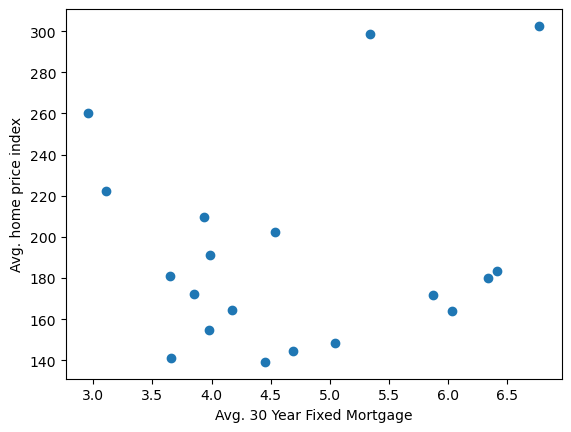

In [ ]:
# Plot Avg. 30 Year Fixed Mortgage versus Avg. Home Price Index
plt.scatter(new_df.loc[:,"Avg. 30 Year Fixed Mortgage Rate"],new_df.loc[:,"Avg. Home Price Index"])
plt.xlabel('Avg. 30 Year Fixed Mortgage')
plt.ylabel('Avg. home price index')
plt.show()

In [ ]:
# Calculate the correlation coefficient between Avg. 15 Year Fixed Mortgage Rate and Avg. Home Price Index
#create a copy of complete_df
new_df15 = new_df.copy()
#Drop N/A Values 
new_df15 = new_df15.dropna()
correlation_coefficient = new_df15['Avg. 15 Year Fixed Mortgage Rate'].corr(new_df15["Avg. Home Price Index"])
print(f"Correlation Coefficient: {correlation_coefficient}") 

NameError: name 'complete_df' is not defined

In [ ]:
plt.scatter(new_df15.loc[:,"Avg. 15 Year Fixed Mortgage Rate"],new_df15.loc[:,"Avg. Home Price Index"])
plt.xlabel('Avg. 15 Year Fixed Mortgage')
plt.ylabel('Avg. home price index')
plt.show()

NameError: name 'new_df15' is not defined